# 準備と確認

In [152]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [153]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline
pd.options.display.precision = 1  # 桁数表示コントロール

In [154]:
# データ保存ディレクトリへ移動
ls = os.getcwd().split('\\')
ls[-1] = 'data'
lsr=""
for i in ls:
    lsr += i+'\\'

# ディレクトリ移動
os.chdir(lsr)

In [155]:
sp_songs = pd.read_csv('./datasets/Popular_Spotify_Songs.csv', encoding="iso-8859-1")

In [156]:
sp_songs.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [157]:
sp_songs.shape

(953, 24)

In [158]:
sp_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

数字データであるべき項目が、object型になっている事が分かるため、以降で前処理する

In [159]:
sp_songs.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [160]:
sp_songs.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,1.6,2018.2,6.0,13.9,5200.1,12.0,67.8,51.9,2.7,122.5,67.0,51.4,64.3,27.1,1.6,18.2,10.1
std,0.9,11.1,3.6,9.2,7897.6,19.6,86.4,50.6,6.0,28.1,14.6,23.5,16.6,26.0,8.4,13.7,9.9
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


# データクリーニングと前処理

In [161]:
# 欠損値の確認
sp_songs.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [162]:
sp_songs['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [163]:
# 曲のキーのユニーク値
keys = sp_songs['key'].unique()

# 文字列の 'nan' を識別するためのマスクを作成
is_nan = np.array([x != x for x in keys])

# 'nan' 以外の要素を抽出してソート
sorted_non_nan = np.sort(keys[~is_nan])

# 'nan' 要素を抽出
nans = keys[is_nan]

# ソートされた非 'nan' 要素と 'nan' 要素を結合
sorted_keys = np.concatenate([sorted_non_nan, nans])

print(sorted_keys)

['A' 'A#' 'B' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#' nan]


In [164]:
# 再生回数のユニーク値
len(sp_songs['streams'].unique())

949

In [165]:
# deezerプレイリストのユニーク値
sp_songs['in_deezer_playlists'].unique()[:10]

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66'],
      dtype=object)

In [166]:
def clean_numeric_data(x):
    try:
        return int(x)
    except ValueError:
        return 0

In [167]:
# 整数型へ一括変更処理
sp_songs['streams'] = sp_songs['streams'].apply(lambda x: clean_numeric_data(x))
sp_songs['in_shazam_charts'] = sp_songs['in_shazam_charts'].apply(lambda x: clean_numeric_data(x))
sp_songs['in_deezer_playlists'] = sp_songs['in_deezer_playlists'].apply(lambda x: clean_numeric_data(x))

In [168]:
# keyの欠損値を埋める
sp_songs['key'] = sp_songs['key'].fillna('Unknown')

# クリーニング後の確認
sp_songs.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [169]:
# クリーニング後の確認
sp_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

# データ整形

In [170]:
# 年代ベースでグループ化
year_based_df = sp_songs.groupby('released_year').agg(
    # 指定された各列に対して、各属性（列）の値をリストとして集約。
    # これにより、同じ年にリリースされた全トラックの各属性がリストとして保存
    (
        {'track_name': list,
         'artist(s)_name': list,
         'artist_count': list,
         'in_spotify_playlists': list,
         'in_spotify_charts': list,
         'streams': list,
         'in_apple_playlists': list,
         'in_apple_charts': list,
         'in_deezer_playlists': list,
         'in_deezer_charts': list,
         'in_shazam_charts': list,
         'bpm': list,
         'key': list,
         'mode': list
         }
    )
).reset_index()

year_based_df['count'] = year_based_df['in_apple_playlists'].apply(lambda x: len(x))
year_based_df.tail(1)

,released_year,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,count
49,2023,"[Seven (feat. Latto) (Explicit Ver.), LALA, va...","[Latto, Jung Kook, Myke Towers, Olivia Rodrigo...","[2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...","[553, 1474, 1397, 3133, 2186, 3090, 714, 1096,...","[147, 48, 113, 50, 91, 50, 43, 83, 44, 40, 55,...","[141381703, 133716286, 140003974, 303236322, 1...","[43, 48, 94, 84, 67, 34, 25, 60, 49, 41, 37, 3...","[263, 126, 207, 133, 213, 222, 89, 210, 110, 2...","[45, 58, 91, 87, 88, 43, 30, 48, 66, 54, 21, 7...","[10, 14, 14, 15, 17, 13, 13, 11, 13, 12, 5, 58...","[826, 382, 949, 425, 946, 418, 194, 953, 339, ...","[125, 92, 138, 144, 141, 148, 100, 130, 170, 8...","[B, C#, F, A, C#, F, F, C#, D, F#, F, Unknown,...","[Major, Major, Major, Minor, Major, Minor, Maj...",175


# データ可視化

## 0) Function for Creating Graph

In [171]:
def create_bar_plot(figsize_x, figsize_y,
                    x_value, y_value,
                    data_value, labels_value,
                    plt_title, plt_xlabel, plt_ylabel):

    plt.figure(figsize=(figsize_x, figsize_y))
    songs_plt = sns.barplot(x=x_value, y=y_value, data=data_value)
    songs_plt.bar_label(songs_plt.containers[0], labels=labels_value, rotation=90)
    plt.title(plt_title)
    plt.xlabel(plt_xlabel)
    plt.ylabel(plt_ylabel)
    plt.xticks(rotation=90)
    plt.show()

## 1) Most streamed songs in each year

In [172]:
streamed_df = sp_songs.sort_values(
    # 発表年と再生回数で降順ソートして、発表年で重複しているものを削除
    by=['released_year', 'streams'],
    ascending=False
).drop_duplicates('released_year').reset_index()

streamed_df = streamed_df.sort_values(by=['released_year'], ascending=False)
streamed_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,...,118,Unknown,Major,71,65,68,6,0,3,7
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,...,170,C#,Major,59,48,76,4,0,10,5
3,71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,...,81,B,Major,76,53,53,44,0,9,9
4,55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,...,171,C#,Major,50,38,80,0,0,9,7
5,86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,...,110,C#,Major,50,45,41,75,0,11,3
6,179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,...,96,C#,Minor,83,93,65,58,0,9,8
7,162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,...,104,C#,Major,77,36,63,1,0,36,5
8,762,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,...,100,E,Major,61,53,38,84,0,28,44
9,685,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,...,79,D,Major,78,58,45,47,0,18,3


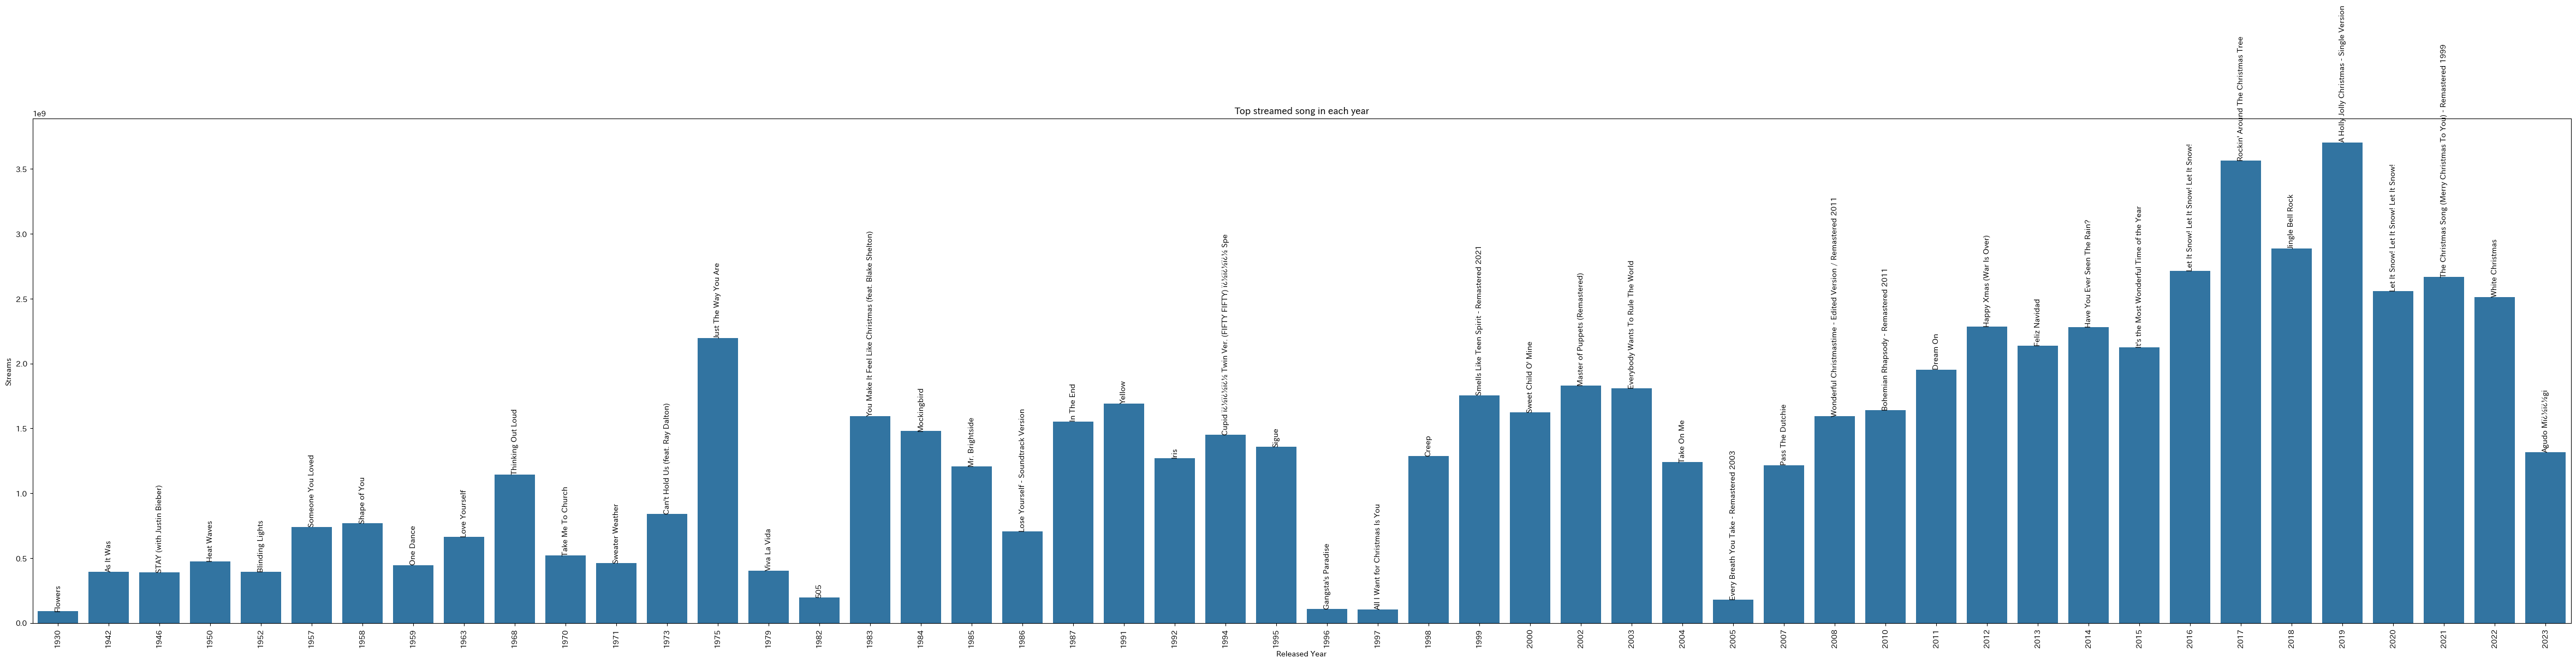

In [173]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="streams",
                data_value=streamed_df,
                labels_value=streamed_df["track_name"],
                plt_title="Top streamed song in each year",
                plt_xlabel="Released Year",
                plt_ylabel="Streams")

## 2) Top 5 most streamed songs ever

In [174]:
top_5_streamed_df = sp_songs.sort_values(by=['streams'], ascending=False)
top_5_streamed_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


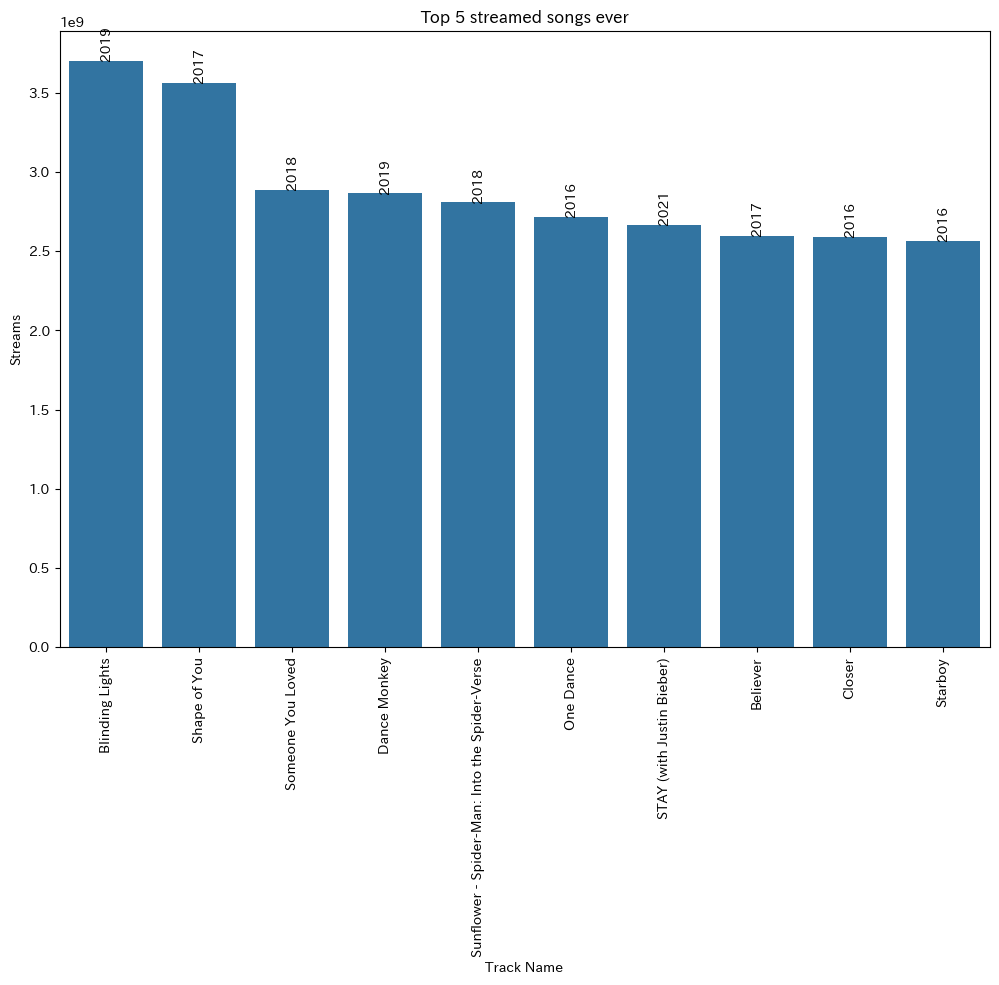

In [175]:
create_bar_plot(figsize_x=12,
                figsize_y=8,
                x_value="track_name",
                y_value="streams",
                data_value=top_5_streamed_df.head(10),
                labels_value=top_5_streamed_df["released_year"].head(10),
                plt_title="Top 5 streamed songs ever",
                plt_xlabel="Track Name",
                plt_ylabel="Streams")

## 3) Most added song in Spotify playlist of each year

In [176]:
spotify_playlists_df = sp_songs.sort_values(
    # 発表年とプレイリストの数で降順ソートして、発表年で重複しているものを削除
    by=['released_year', 'in_spotify_playlists'],
    ascending=False
).drop_duplicates('released_year').reset_index()

spotify_playlists_df = spotify_playlists_df.sort_values(by=['released_year'], ascending=False)
spotify_playlists_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,...,118,Unknown,Major,71,65,68,6,0,3,7
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,...,170,C#,Major,59,48,76,4,0,10,5
3,71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,...,81,B,Major,76,53,53,44,0,9,9
4,55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,...,171,C#,Major,50,38,80,0,0,9,7
5,41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,...,90,D,Major,76,91,50,54,0,7,5
6,672,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,...,150,C#,Minor,91,42,60,0,0,9,12
7,162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,...,104,C#,Major,77,36,63,1,0,36,5
8,325,The Hills,The Weeknd,1,2015,5,27,25744,4,1947371785,...,136,Unknown,Minor,36,12,57,9,0,14,8
9,685,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,...,79,D,Major,78,58,45,47,0,18,3


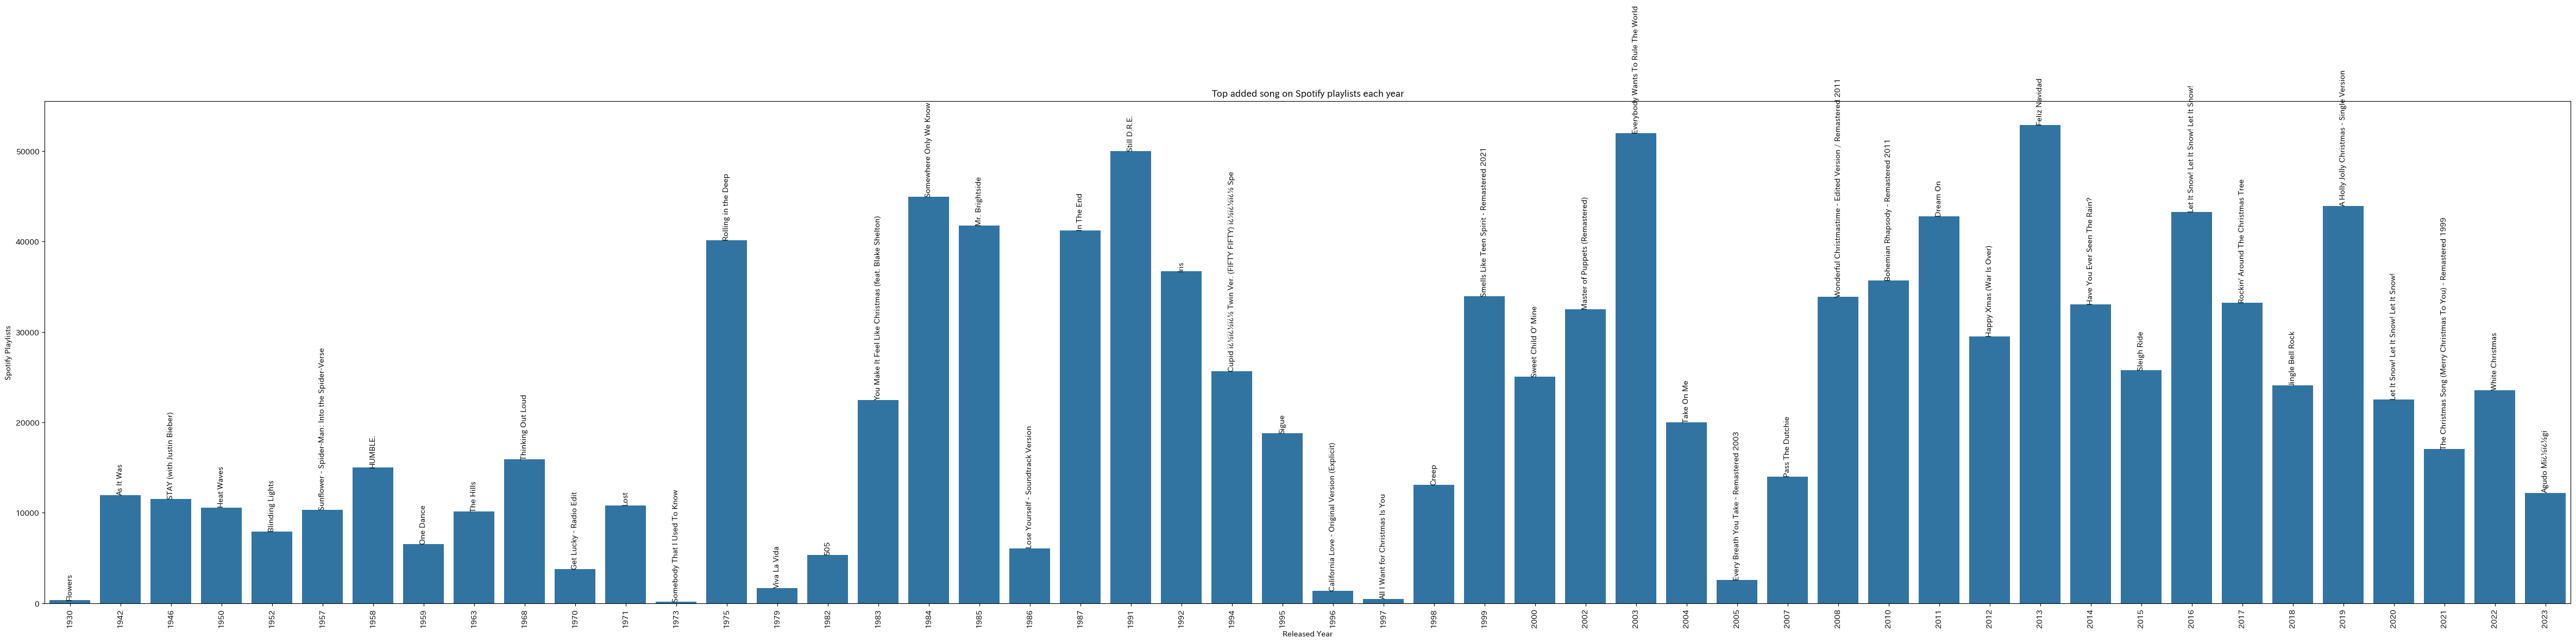

In [177]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_spotify_playlists",
                data_value=spotify_playlists_df,
                labels_value=spotify_playlists_df["track_name"],
                plt_title="Top added song on Spotify playlists each year",
                plt_xlabel="Released Year",
                plt_ylabel="Spotify Playlists")

## 4) Most appeared song on Spotify charts in each year

In [178]:
spotify_charts_df = sp_songs.sort_values(
    # 発表年とチャートの順位で降順ソートして、発表年で重複しているものを削除
    by=['released_year', 'in_spotify_charts'],
    ascending=False
).drop_duplicates('released_year').reset_index()

spotify_charts_df = spotify_charts_df.sort_values(by=['released_year'], ascending=False)
spotify_charts_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,108,Bones,Imagine Dragons,1,2021,3,11,4198,44,838079900,...,114,F,Minor,77,65,72,2,0,7,5
3,71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,...,81,B,Major,76,53,53,44,0,9,9
4,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,170,A,Major,55,58,72,11,0,11,15
5,41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,...,90,D,Major,76,91,50,54,0,7,5
6,43,See You Again,"Tyler, The Creator, Kali Uchis",3,2017,7,21,13387,64,1047101291,...,79,F#,Major,56,58,56,37,0,11,10
7,48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,...,186,G,Major,68,49,59,16,0,13,28
8,88,Makeba,Jain,1,2015,6,22,6060,53,165484133,...,116,D,Major,82,40,66,39,51,25,7
9,37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,...,96,F,Major,75,57,68,9,0,13,6


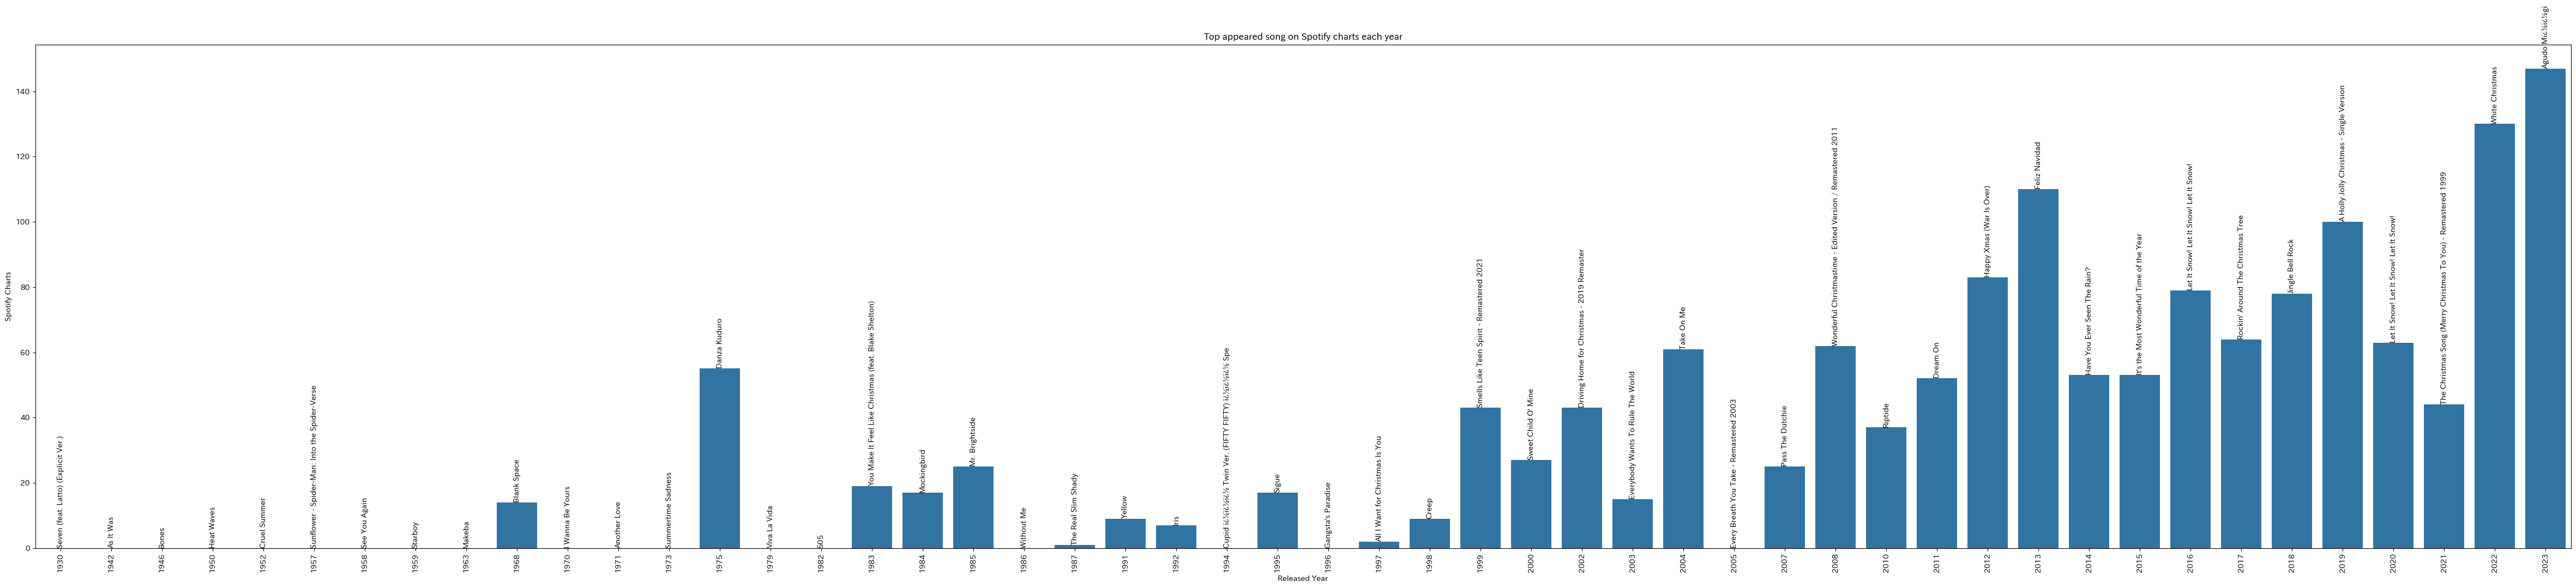

In [179]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_spotify_charts",
                data_value=spotify_charts_df,
                labels_value=spotify_charts_df["track_name"],
                plt_title="Top appeared song on Spotify charts each year",
                plt_xlabel="Released Year",
                plt_ylabel="Spotify Charts")

## 5) Most added song in Apple playlist of each year

In [180]:
apple_playlists_df = sp_songs.sort_values(
    by=['released_year', 'in_apple_playlists'],
    ascending=False
).drop_duplicates('released_year').reset_index()

apple_playlists_df = apple_playlists_df.sort_values(by=['released_year'], ascending=False)
apple_playlists_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,...,118,Unknown,Major,71,65,68,6,0,3,7
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,...,170,C#,Major,59,48,76,4,0,10,5
3,71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,...,81,B,Major,76,53,53,44,0,9,9
4,55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,...,171,C#,Major,50,38,80,0,0,9,7
5,86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,...,110,C#,Major,50,45,41,75,0,11,3
6,403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",2,2017,6,2,27705,10,1897517891,...,124,A,Minor,79,59,86,4,0,8,11
7,162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,...,104,C#,Major,77,36,63,1,0,36,5
8,762,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,...,100,E,Major,61,53,38,84,0,28,44
9,685,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,...,79,D,Major,78,58,45,47,0,18,3


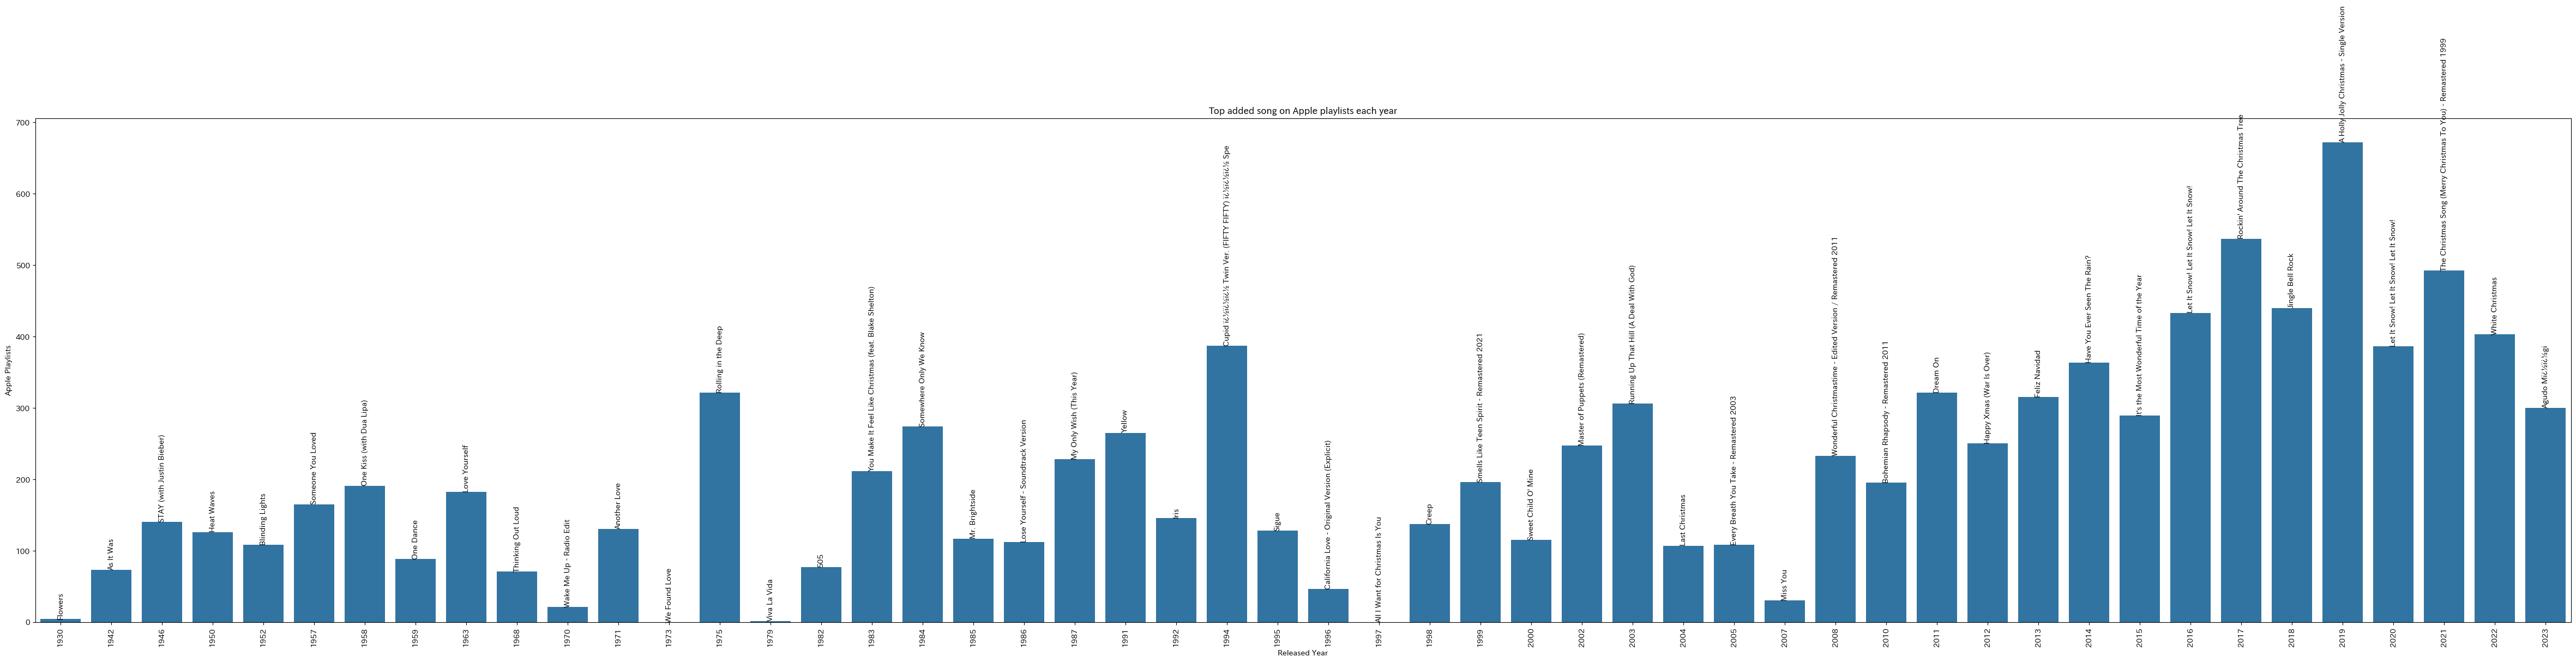

In [181]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_apple_playlists",
                data_value=apple_playlists_df,
                labels_value=apple_playlists_df["track_name"],
                plt_title="Top added song on Apple playlists each year",
                plt_xlabel="Released Year",
                plt_ylabel="Apple Playlists")

## 6) Most appeared song on Apple charts in each year

In [182]:
apple_charts_df = sp_songs.sort_values(
    by=['released_year', 'in_apple_charts'],
    ascending=False
).drop_duplicates('released_year').reset_index()

apple_charts_df = apple_charts_df.sort_values(by=['released_year'], ascending=False)
apple_charts_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,872,Last Last,Burna Boy,1,2022,5,12,4526,12,293466523,...,88,D#,Minor,80,55,56,13,0,8,9
2,532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia",2,2021,10,22,7495,17,611994237,...,120,Unknown,Minor,56,16,67,0,0,11,4
3,555,Dakiti,"Bad Bunny, Jhay Cortez",2,2020,10,30,11215,21,1763363713,...,110,E,Minor,73,14,57,40,0,11,5
4,888,Mary On A Cross,Ghost,1,2019,9,13,2668,2,387080183,...,130,B,Major,47,56,90,0,0,10,4
5,634,Shallow,"Lady Gaga, Bradley Cooper",2,2018,9,27,16636,12,2159346687,...,96,G,Major,57,30,40,38,0,26,3
6,724,Something Just Like This,"The Chainsmokers, Coldplay",2,2017,2,22,23375,21,2204080728,...,103,B,Minor,61,47,65,3,0,17,4
7,725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,...,95,G#,Major,75,64,52,41,0,11,3
8,88,Makeba,Jain,1,2015,6,22,6060,53,165484133,...,116,D,Major,82,40,66,39,51,25,7
9,685,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,...,79,D,Major,78,58,45,47,0,18,3


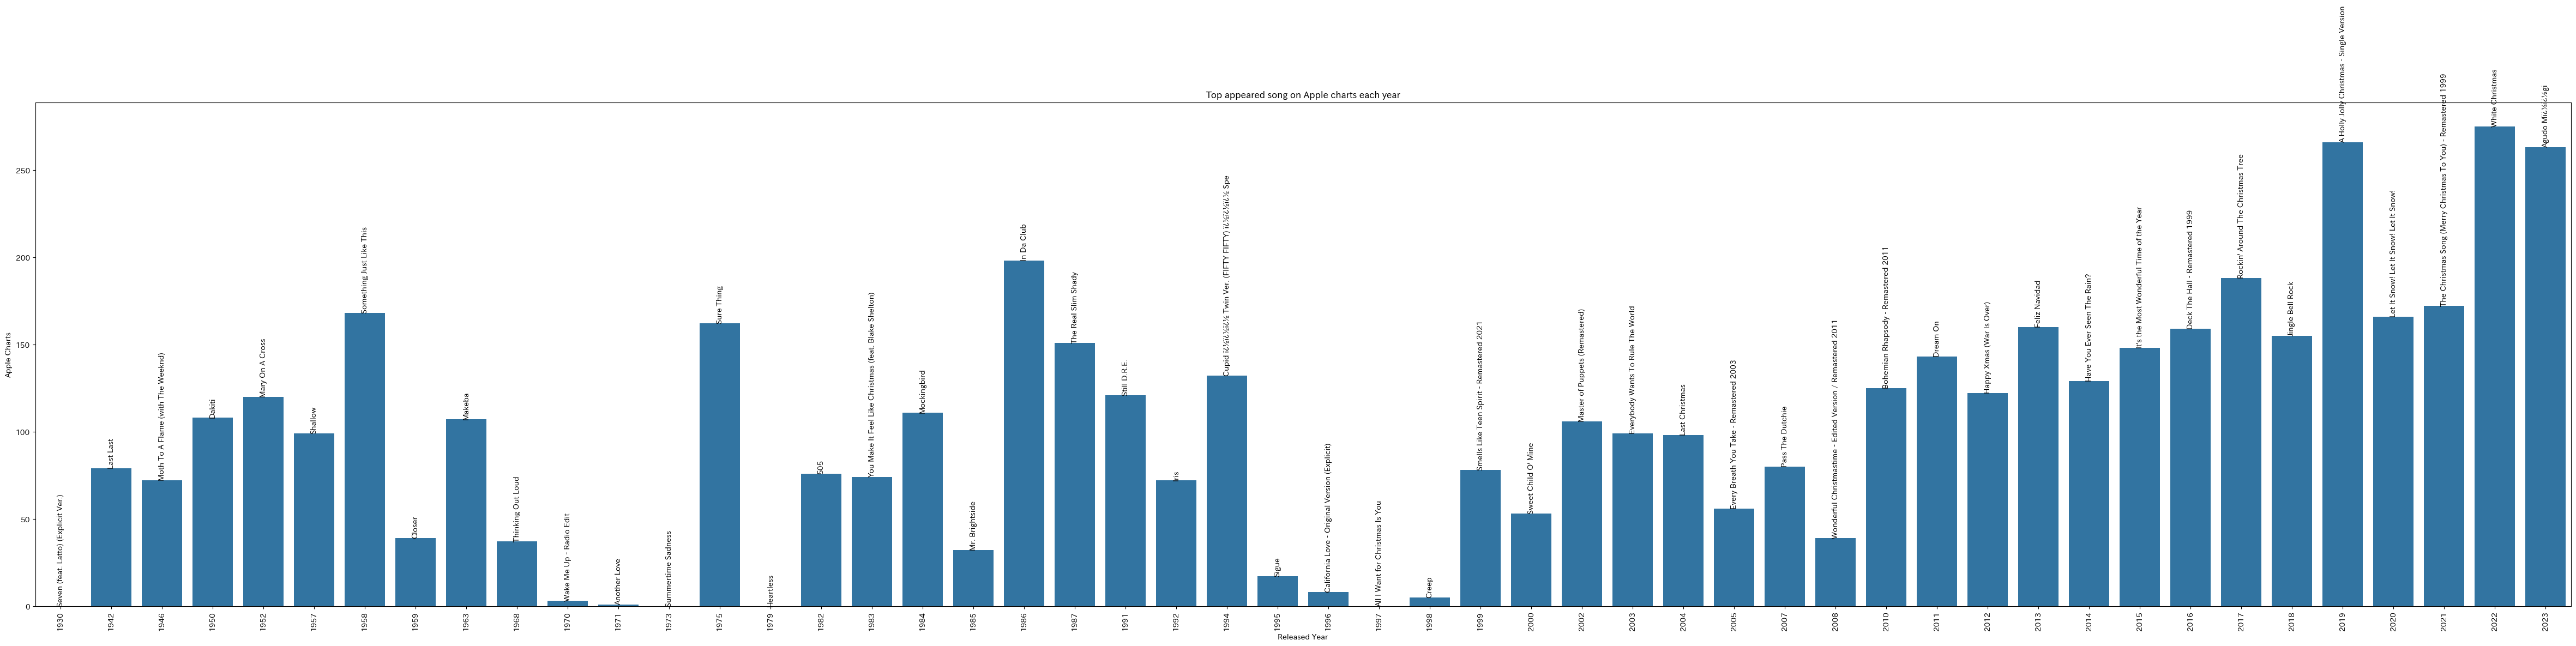

In [183]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_apple_charts",
                data_value=apple_charts_df,
                labels_value=apple_charts_df["track_name"],
                plt_title="Top appeared song on Apple charts each year",
                plt_xlabel="Released Year",
                plt_ylabel="Apple Charts")

## 7) Most added song in Deezer playlist of each year

In [184]:
deezer_playlists_df = sp_songs.sort_values(
    by=['released_year', 'in_deezer_playlists'],
    ascending=False
).drop_duplicates('released_year').reset_index()

deezer_playlists_df = deezer_playlists_df.sort_values(by=['released_year'], ascending=False)
deezer_playlists_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,...,118,Unknown,Major,71,65,68,6,0,3,7
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,507,Pepas,Farruko,1,2021,6,24,14114,17,1309887447,...,130,G,Major,76,44,77,1,0,13,3
3,429,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1555511105,...,126,B,Minor,81,59,90,5,0,36,3
4,187,Circles,Post Malone,1,2019,8,30,19664,16,2132335812,...,120,Unknown,Major,70,59,75,24,0,9,4
5,170,Let Me Down Slowly,Alec Benjamin,1,2018,5,25,5897,19,1374581173,...,150,C#,Minor,65,51,55,73,0,14,3
6,526,Beggin,Mï¿½ï¿½ne,1,2017,12,8,8559,0,1367810478,...,134,B,Minor,71,59,80,13,0,36,5
7,186,Pink + White,Frank Ocean,1,2016,8,20,21574,30,806397070,...,160,A,Major,54,54,55,67,0,42,11
8,167,The Night We Met,Lord Huron,1,2015,2,2,18515,35,1410088830,...,174,D,Major,45,10,37,97,25,64,4
9,115,No Role Modelz,J. Cole,1,2014,12,9,21164,36,1791000570,...,100,A#,Minor,70,47,52,30,0,6,33


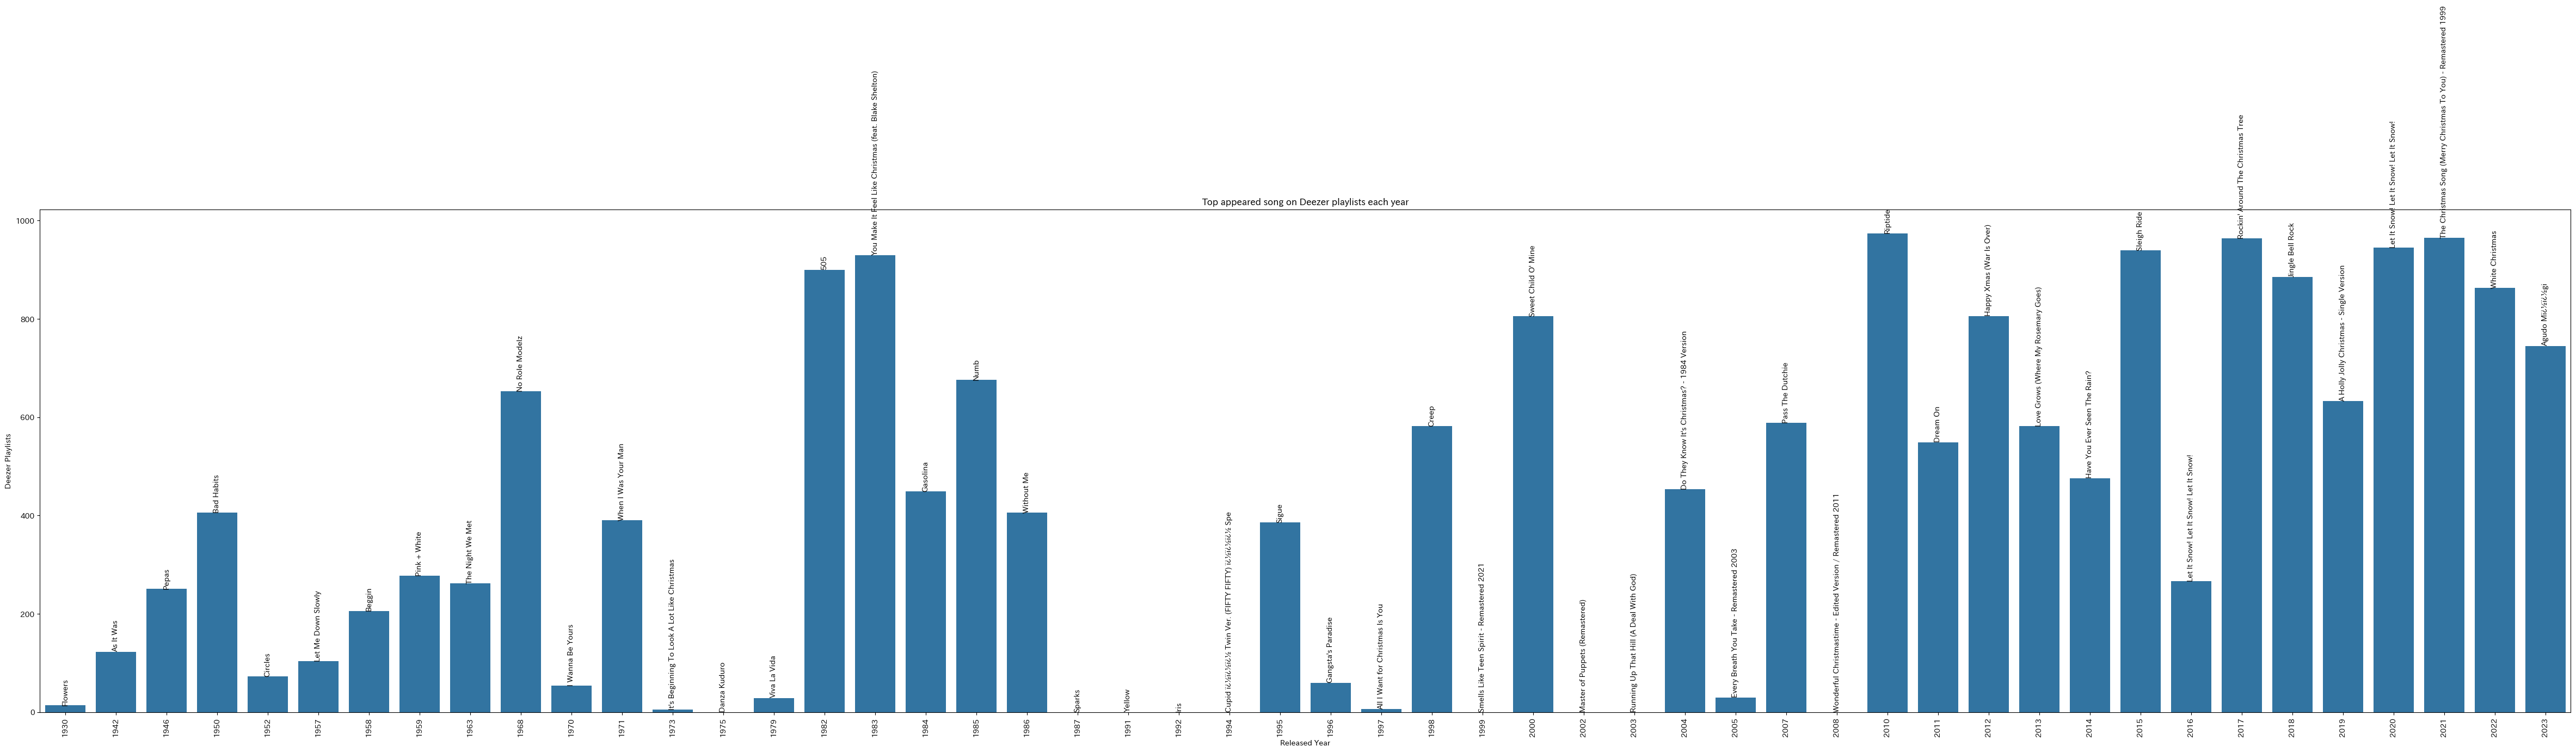

In [185]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_deezer_playlists",
                data_value=deezer_playlists_df,
                labels_value=deezer_playlists_df["track_name"],
                plt_title="Top appeared song on Deezer playlists each year",
                plt_xlabel="Released Year",
                plt_ylabel="Deezer Playlists")

## 8) Most appeared song on Deezer charts in each year

In [186]:
deezer_charts_df = sp_songs.sort_values(
    by=['released_year', 'in_deezer_charts'],
    ascending=False
).drop_duplicates('released_year').reset_index()

deezer_charts_df = deezer_charts_df.sort_values(by=['released_year'], ascending=False)
deezer_charts_df.head(10)

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,...,118,Unknown,Major,71,65,68,6,0,3,7
1,14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,...,174,F#,Minor,52,66,73,34,0,31,6
2,84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,...,170,C#,Major,59,48,76,4,0,10,5
3,71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,...,81,B,Major,76,53,53,44,0,9,9
4,55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,...,171,C#,Major,50,38,80,0,0,9,7
5,634,Shallow,"Lady Gaga, Bradley Cooper",2,2018,9,27,16636,12,2159346687,...,96,G,Major,57,30,40,38,0,26,3
6,106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,1605224506,...,116,C#,Major,80,92,80,4,0,10,3
7,389,"Sex, Drugs, Etc.",Beach Weather,1,2016,11,4,3006,16,480507035,...,144,E,Minor,57,47,84,1,1,52,4
8,88,Makeba,Jain,1,2015,6,22,6060,53,165484133,...,116,D,Major,82,40,66,39,51,25,7
9,176,Shake It Off,Taylor Swift,1,2014,1,1,21335,13,1113838873,...,160,G,Major,65,95,80,5,0,41,16


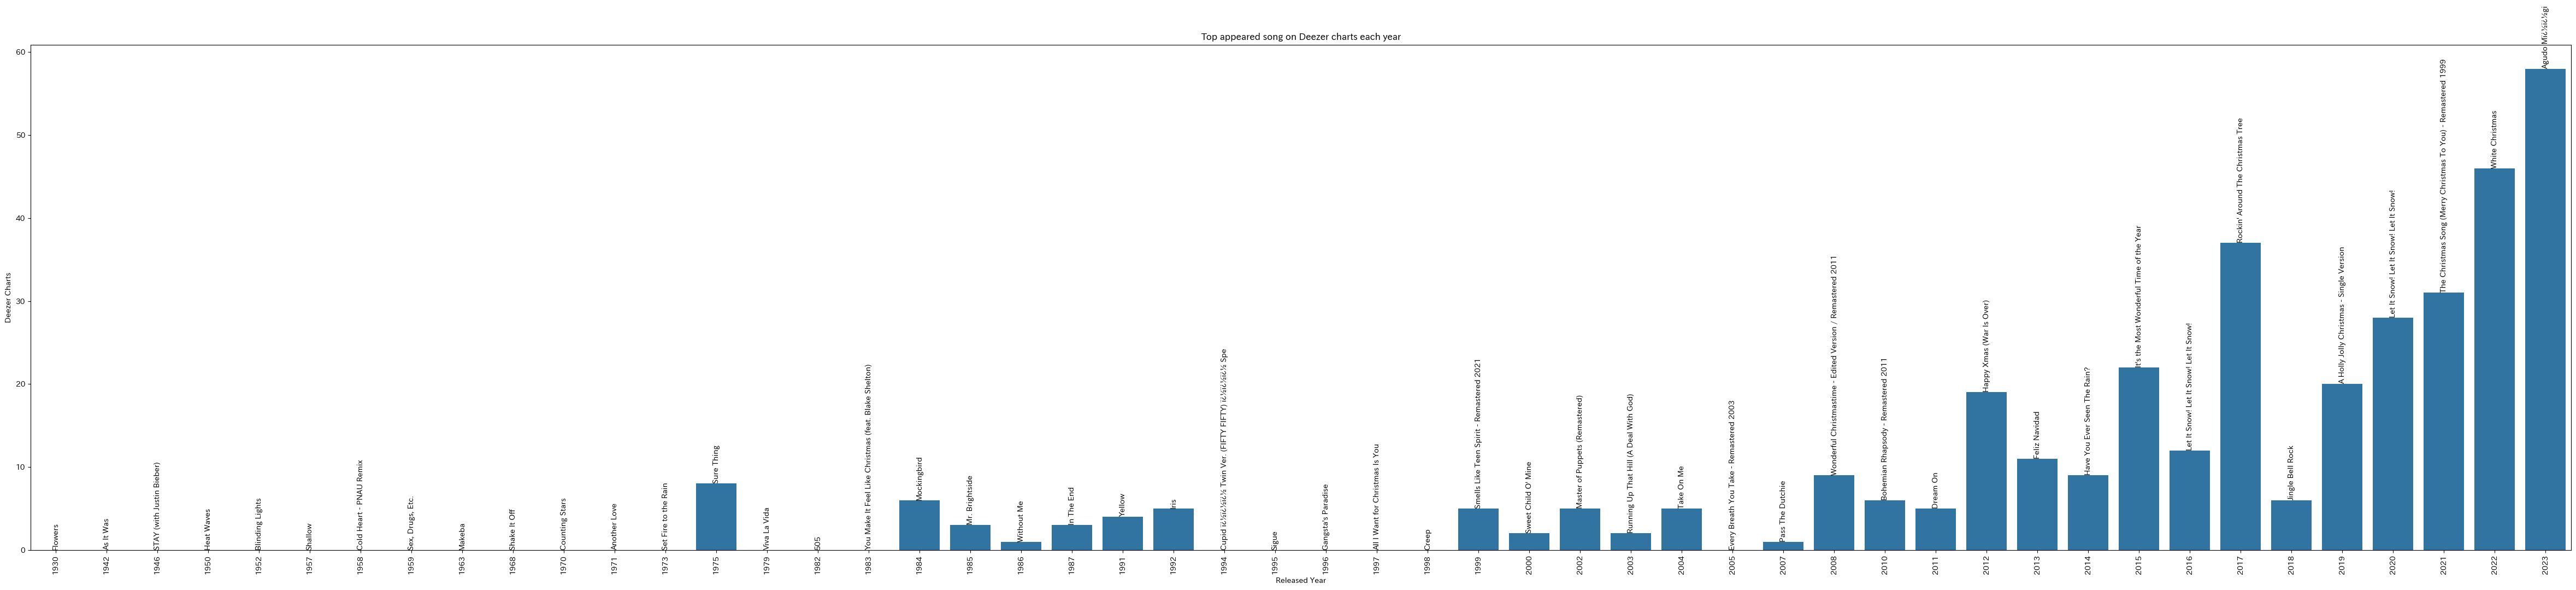

In [187]:
create_bar_plot(figsize_x=60,
                figsize_y=12,
                x_value="released_year",
                y_value="in_deezer_charts",
                data_value=deezer_charts_df,
                labels_value=deezer_charts_df["track_name"],
                plt_title="Top appeared song on Deezer charts each year",
                plt_xlabel="Released Year",
                plt_ylabel="Deezer Charts")

## 9) Top 5 most used keys in songs

In [190]:
keys_used = sp_songs.groupby('key').agg(
    (
        {'track_name': list,
         'artist(s)_name': list
         }
    )
).reset_index()

keys_used['key_frequency'] = keys_used['track_name'].apply(lambda x: len(x))
keys_used = keys_used.sort_values(by=['key_frequency'], ascending=False)

mask = keys_used['key'] == 'Unknown'  # key が Unknown は除外
keys_used = keys_used[~mask]

keys_used.head(10)

,key,track_name,artist(s)_name,key_frequency
3,C#,"[LALA, Sprinter, fukumean, Popular (with Playb...","[Myke Towers, Dave, Central Cee, Gunna, The We...",120
9,G,"[Like Crazy, SABOR FRESA, I'm Good (Blue), Sta...","[Jimin, Fuerza Regida, Bebe Rexha, David Guett...",96
10,G#,"[Kill Bill, Karma, Enchanted (Taylor's Version...","[SZA, Taylor Swift, Taylor Swift, Marshmello, ...",91
7,F,"[vampire, Ella Baila Sola, Columbia, Super Shy...","[Olivia Rodrigo, Eslabon Armado, Peso Pluma, Q...",89
2,B,"[Seven (feat. Latto) (Explicit Ver.), Cupid - ...","[Latto, Jung Kook, Fifty Fifty, Feid, Young Mi...",81
4,D,"[La Bebe - Remix, Daylight, Style, Sunflower -...","[Peso Pluma, Yng Lvcas, David Kushner, Taylor ...",81
0,A,"[Cruel Summer, WHERE SHE GOES, El Azul, MONTAG...","[Taylor Swift, Bad Bunny, Junior H, Peso Pluma...",75
8,F#,"[un x100to, As It Was, I Can See You (Taylorï¿...","[Bad Bunny, Grupo Frontera, Harry Styles, Tayl...",73
6,E,"[Anti-Hero, TQG, Another Love, Here With Me, M...","[Taylor Swift, Karol G, Shakira, Tom Odell, d4...",62
1,A#,"[El Cielo, People, Sweater Weather, Until I Fo...","[Feid, Myke Towers, Sky Rompiendo, Libianca, T...",57


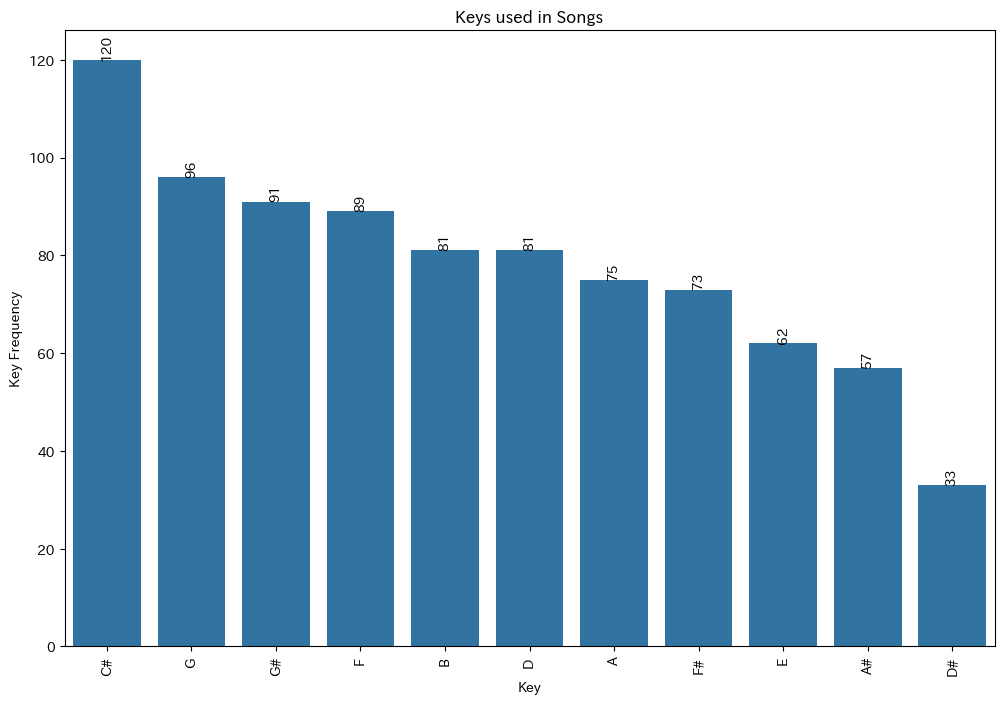

In [192]:
create_bar_plot(figsize_x=12,
                figsize_y=8,
                x_value="key",
                y_value="key_frequency",
                data_value=keys_used,
                labels_value=keys_used["key_frequency"],
                plt_title="Keys used in Songs",
                plt_xlabel="Key",
                plt_ylabel="Key Frequency")